In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

mpl.style.use('ggplot')

import numpy as np
import pandas as pd
from PIL import Image

from pywaffle import Waffle
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import urllib
from warnings import filterwarnings
filterwarnings(action='ignore',category=FutureWarning)

In [2]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print("Data read into a pandas Dataframe")

Data read into a pandas Dataframe


In [3]:
df.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.shape

(195, 39)

In [5]:
df.set_index('Country', inplace=True)

In [6]:
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [7]:
total_values = df_dns['Total'].sum()
total_values

category_proportions = df_dns['Total']/total_values
category_proportions

pd.DataFrame({"category_proportions": category_proportions})

,category_proportions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [8]:
width = 40
height = 10

total_num_of_Tiles = width*height

print(f"Total Number of tiles is {total_num_of_Tiles}")

Total Number of tiles is 400


In [9]:
tiles_per_category = (category_proportions *
                      total_num_of_Tiles).round().astype(int)

pd.DataFrame({"Number of Tiles": tiles_per_category})

,Number of Tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [10]:
waffle_chart = np.zeros((height, width), dtype=np.uint)

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[row, col] = category_index

print("Waffle Chart Populated")

Waffle Chart Populated


In [11]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

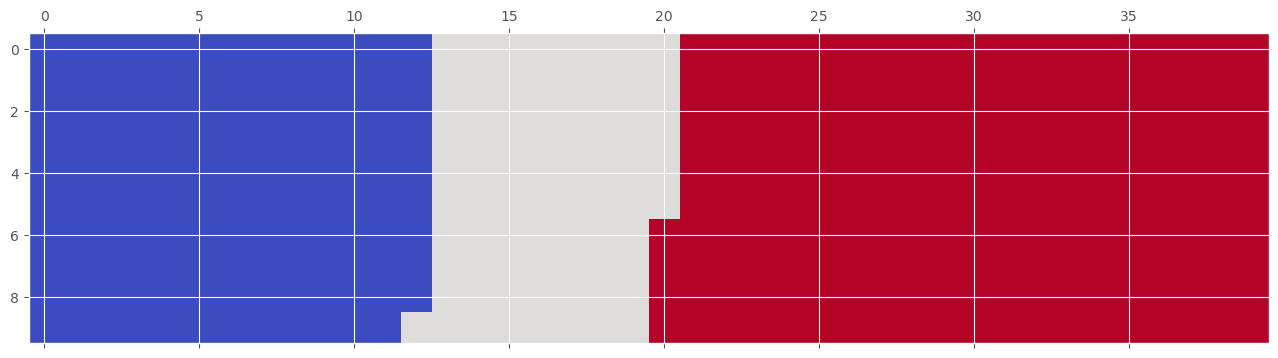

In [12]:
fig = plt.figure()

colormap = plt.cm.coolwarm

plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar
plt.show()

<Figure size 640x480 with 0 Axes>

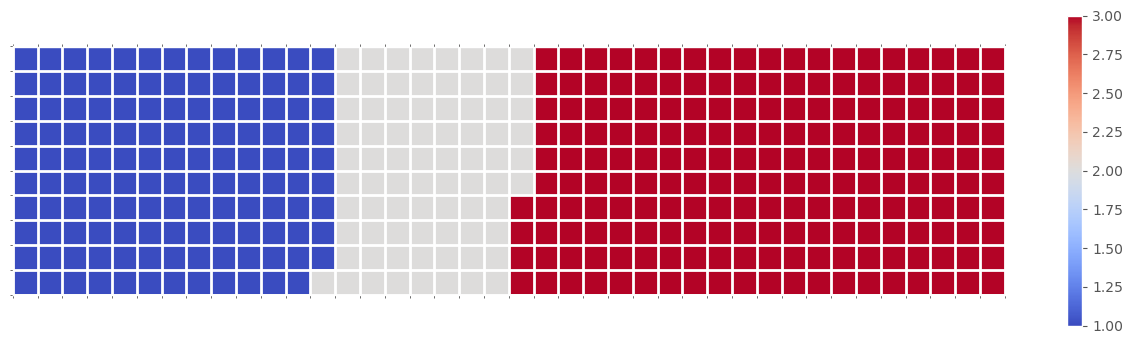

In [13]:
fig = plt.figure()
colormap = plt.cm.coolwarm

plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 640x480 with 0 Axes>

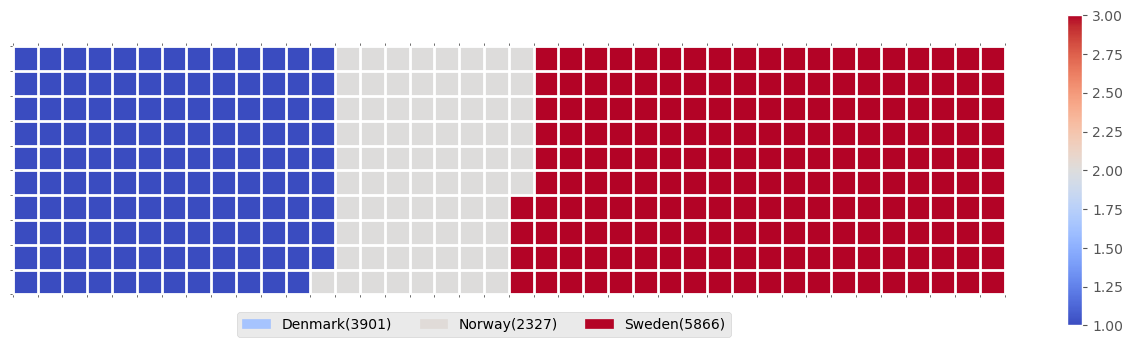

In [14]:
fig = plt.figure()
colormap = plt.cm.coolwarm

plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category+'(' + str(df_dns['Total'][i])+')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, 1)
           )
plt.show()

In [15]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height  # total number of tiles
    print('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles)
                          for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dns.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [16]:
width = 40
height = 10

categories = df_dns.index.values

values = df_dns['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

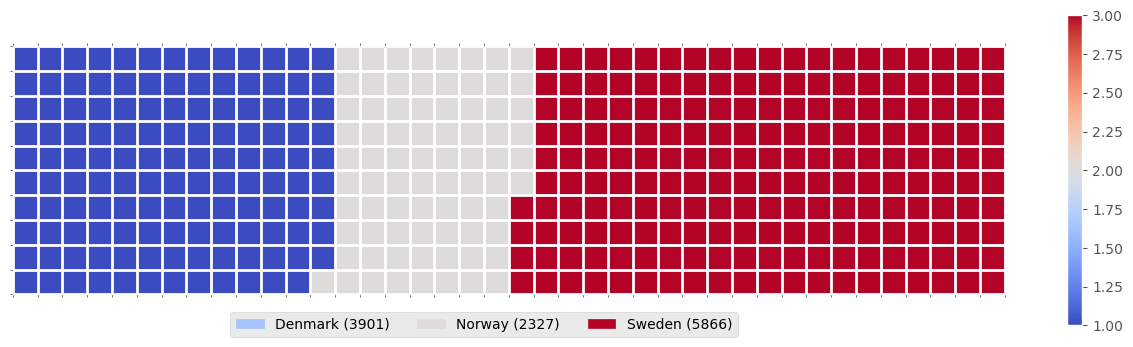

In [17]:
create_waffle_chart(categories, values, height, width, colormap)

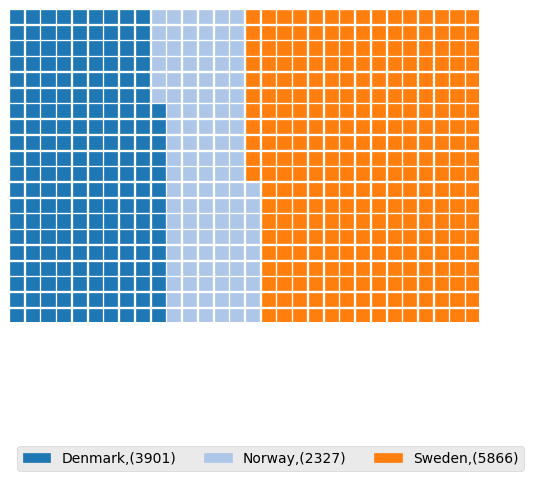

In [25]:
fig = plt.figure(FigureClass=Waffle,
                 rows=20, columns=30,
                 values=df_dns['Total'],
                 cmap_name='tab20',
                 legend={'labels': [f"{k},({v})" for k, v in zip(df_dns.index.values, df_dns.Total)],
                         'loc': 'lower left', "bbox_to_anchor": (0, -0.5), 'ncol': 3}
                 )

plt.show()

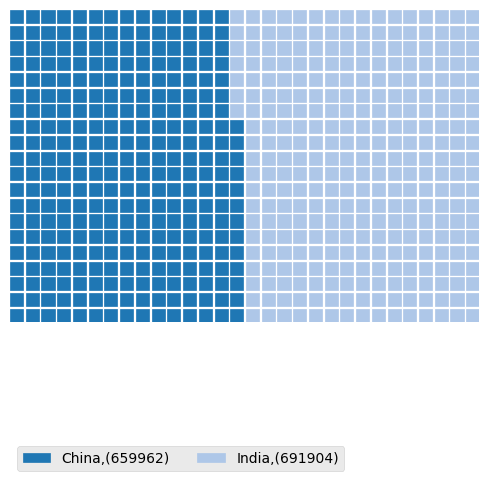

In [31]:
df_CI = df.loc[["China", "India"], :]

fig = plt.figure(FigureClass=Waffle,
                 rows=20, columns=30,
                 values=df_CI["Total"],
                 cmap_name='tab20',
                 legend={'labels': [f"{k},({v})" for k, v in zip(df_CI.index.values, df_CI.Total)],
                         'loc': 'lower left', "bbox_to_anchor": (0, -0.5), 'ncol': 3}
                 )

plt.show()

In [34]:
import urllib.request


novel = urllib.request.urlopen(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [35]:
stopwords = set(STOPWORDS)

In [36]:
alice_wc = WordCloud()

alice_wc.generate(novel)

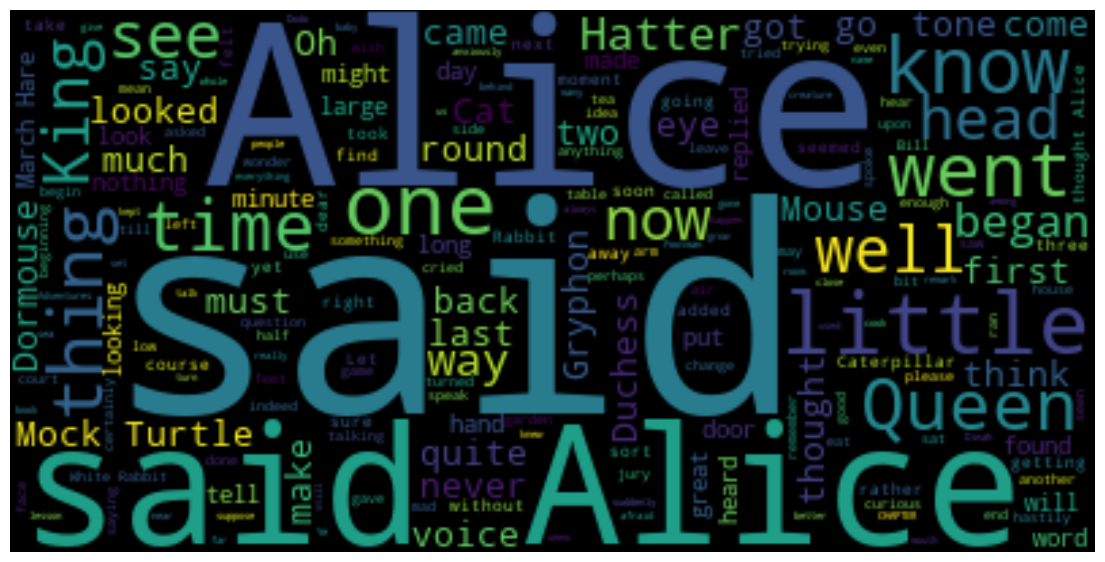

In [39]:
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

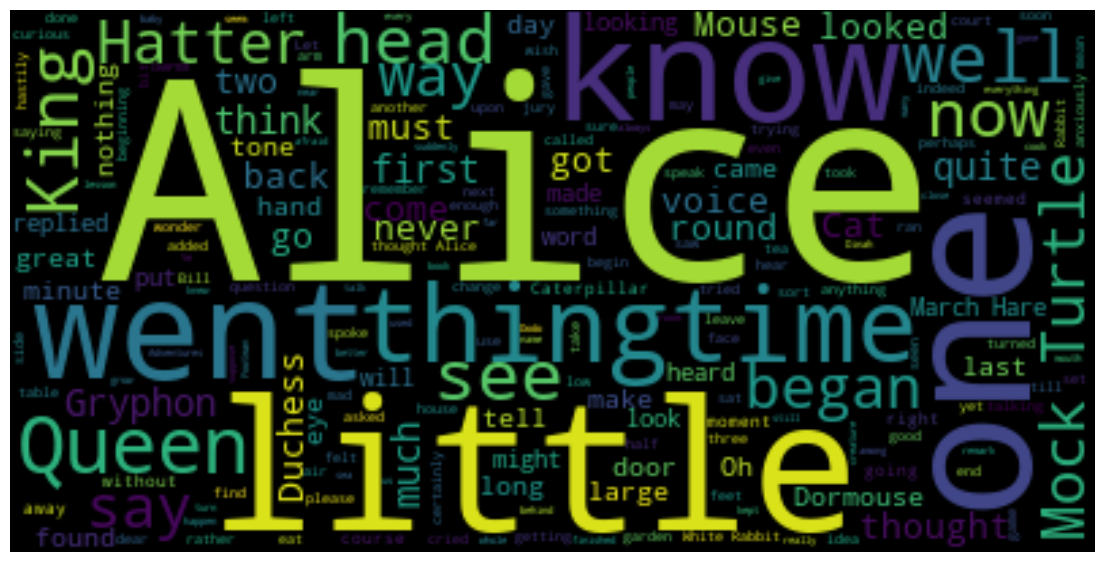

In [44]:
STOPWORDS.add("said")
alice_wc.generate(novel)

plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
alice_mask = np.array(Image.open(urllib.request.urlopen(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

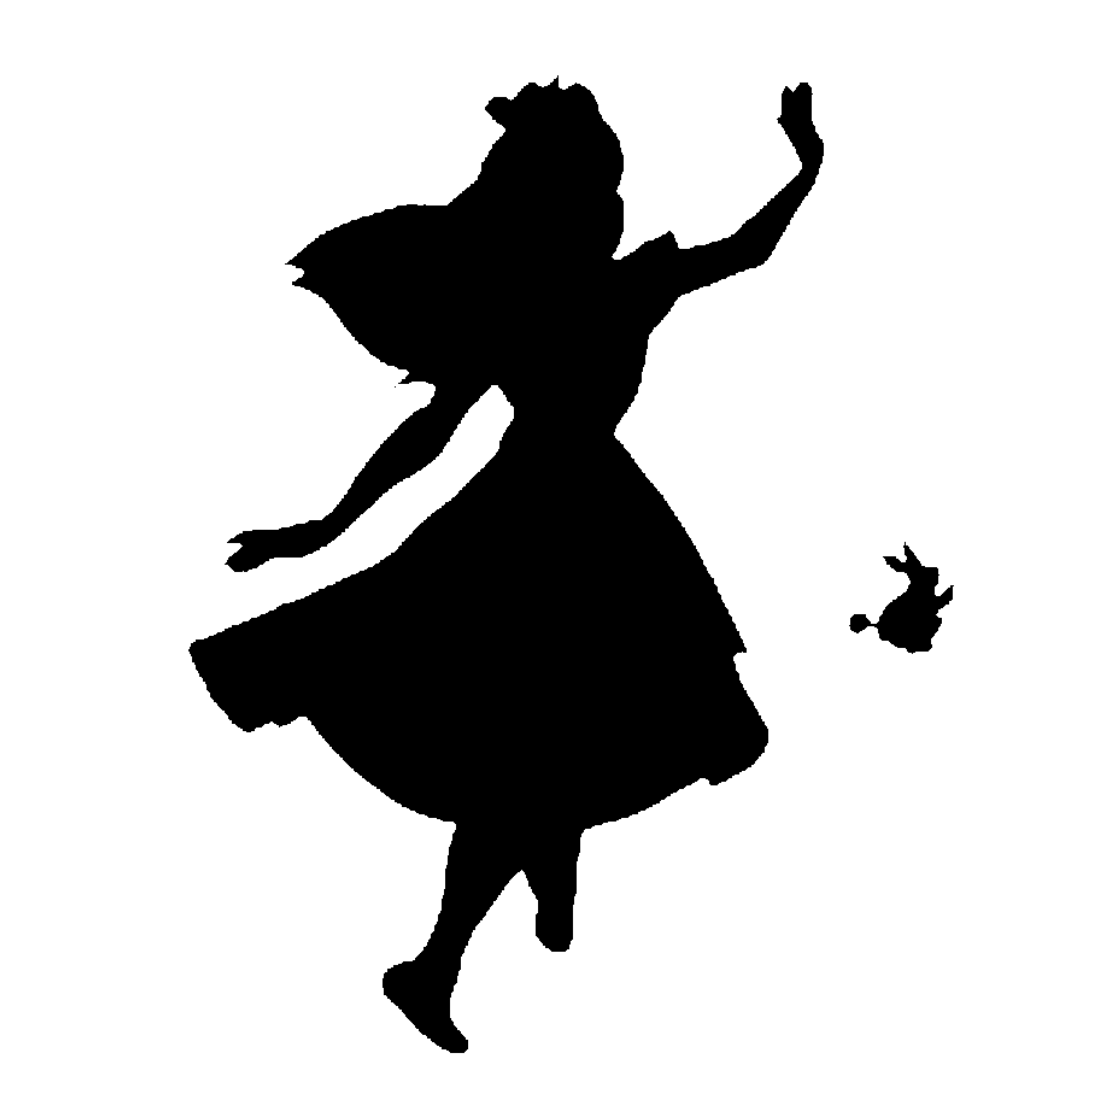

In [47]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

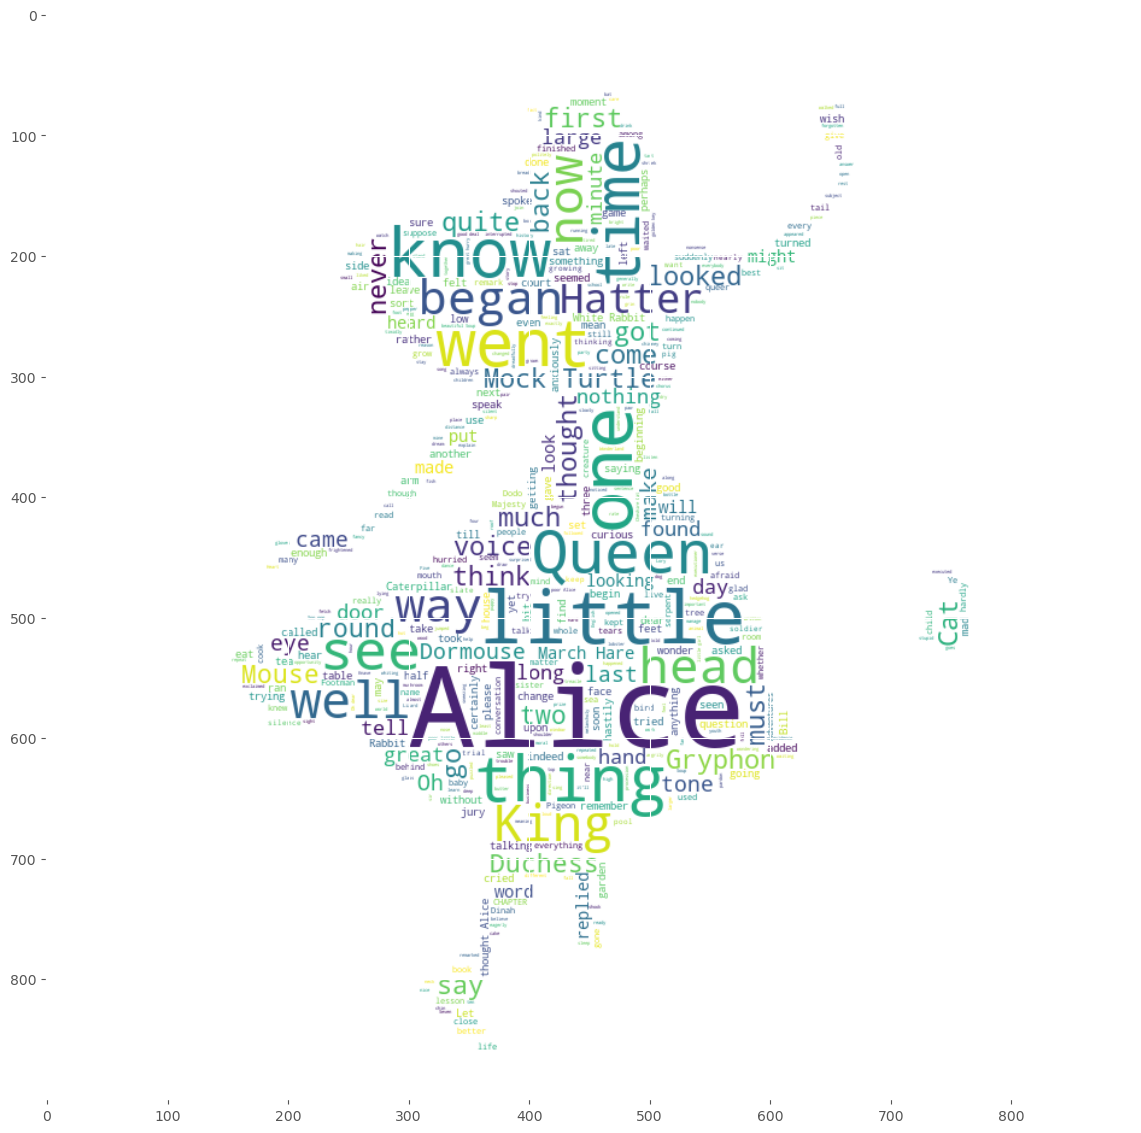

In [48]:
alice_wc = WordCloud(background_color='white', max_words=2000,
                     mask=alice_mask, stopwords=stopwords)

alice_wc.generate(novel)
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.show()

In [49]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [50]:
total_immigration = df['Total'].sum()
total_immigration

6409153

In [77]:
max_words = 90
word_string = ''
for country in df.index.values:
    if country.count(" ") == 0:
        repeat_num_times = int(
            df.loc[country, 'Total']/total_immigration*max_words)
        word_string = word_string+((country+' ')*repeat_num_times)


word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [78]:
wordcloud1 = WordCloud(background_color='white').generate(word_string)
print("Word CLoud Created")

Word CLoud Created


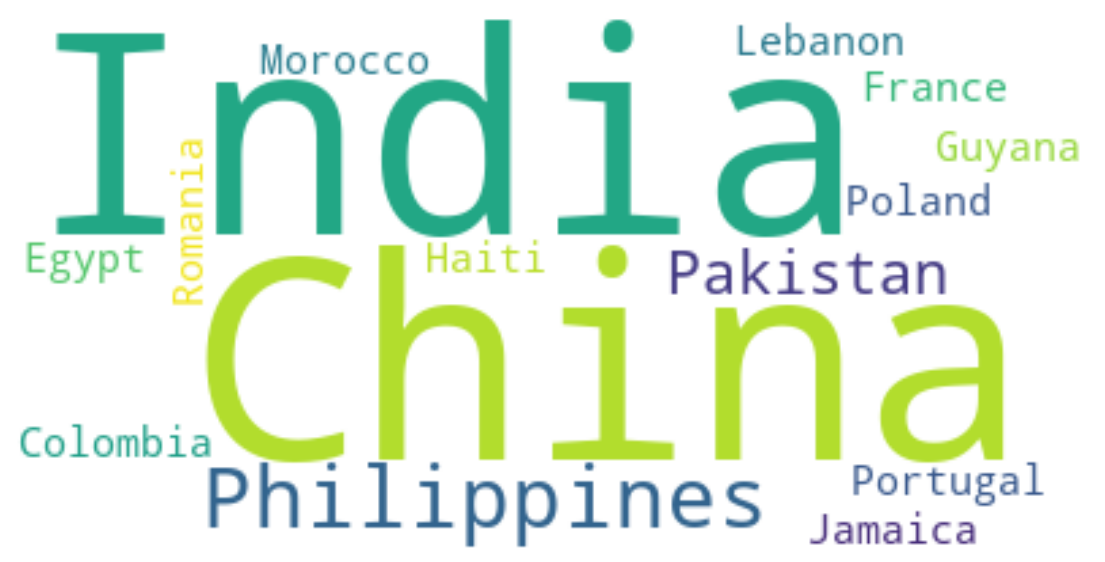

In [79]:
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

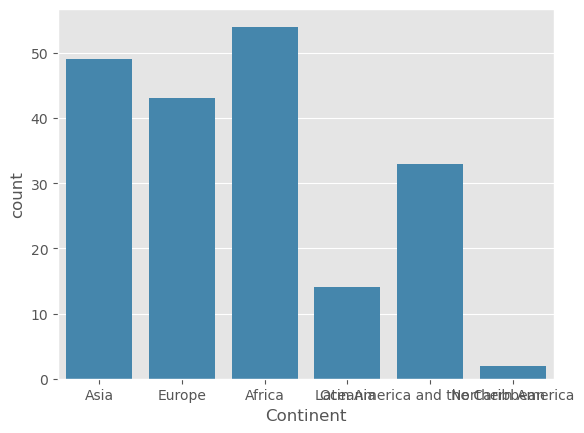

In [85]:
sns.countplot(x='Continent', data=df)
plt.show()

In [99]:
df1 = df.replace('Latin America and the Caribbean', "L_America")
df1 = df1.replace("Northern America", "N_America")

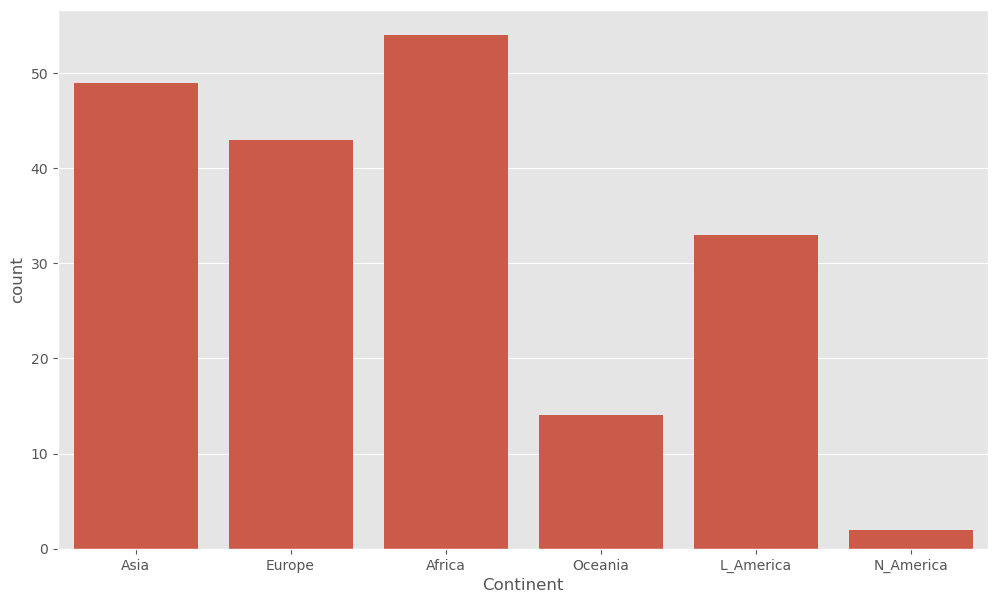

In [101]:
plt.figure(figsize=(12, 7))
sns.countplot(x="Continent", data=df1)

plt.show()

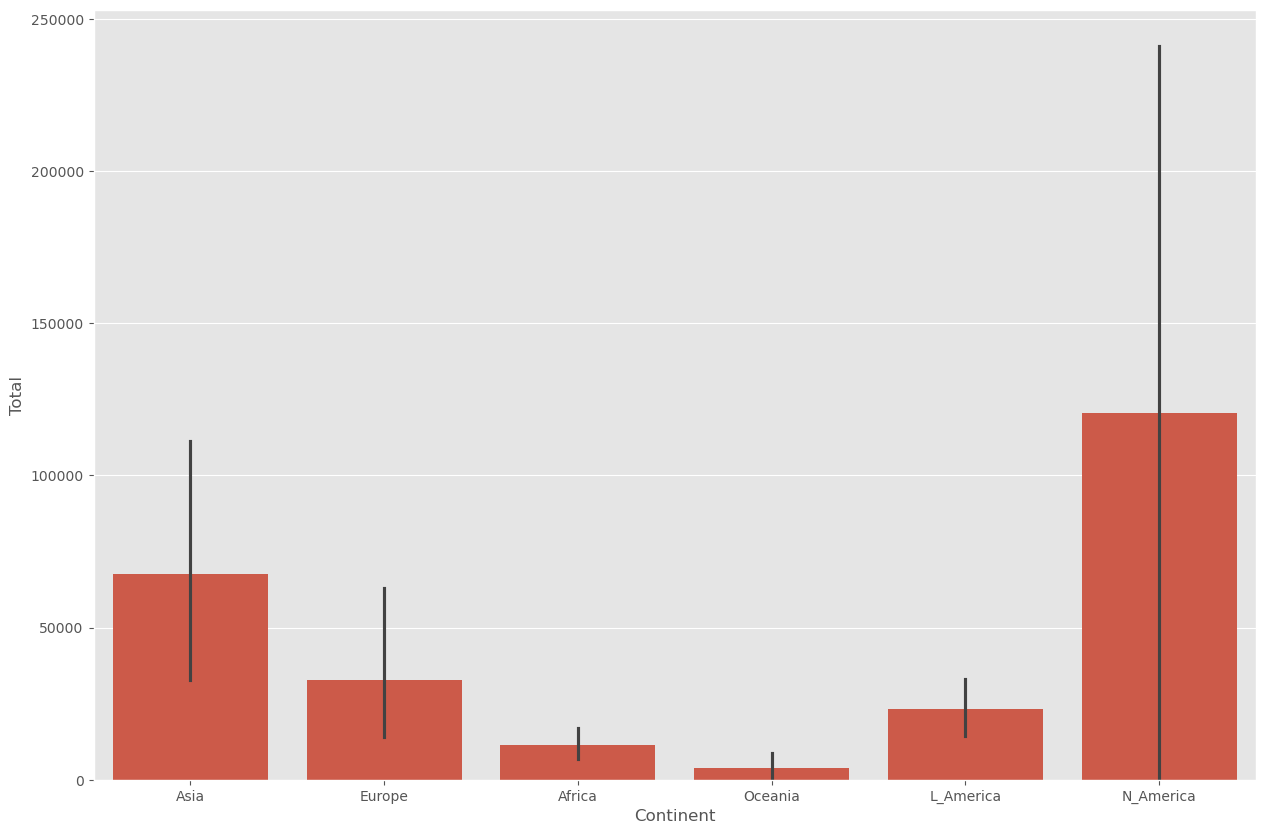

In [104]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Continent", y="Total", data=df1)

plt.show()

In [105]:
df2 = df1.groupby("Continent")['Total'].mean()
df2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L_America     23186.303030
N_America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

In [108]:
years = list(map(str, range(1980, 2013)))

df_tot = pd.DataFrame(df[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ["Year", "Total"]

df_tot.head()

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


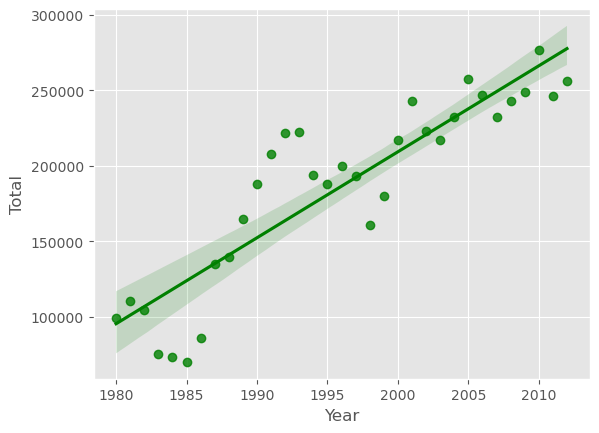

In [109]:
sns.regplot(x="Year", y="Total", data=df_tot, color="green")

plt.show()

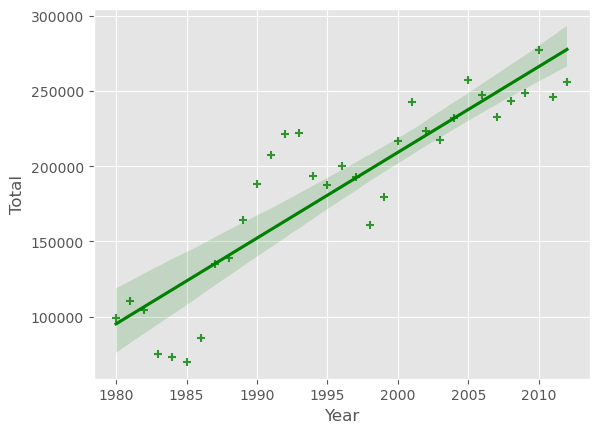

In [111]:
ax = sns.regplot(x='Year', y='Total', data=df_tot, color='green', marker='+')
plt.show()

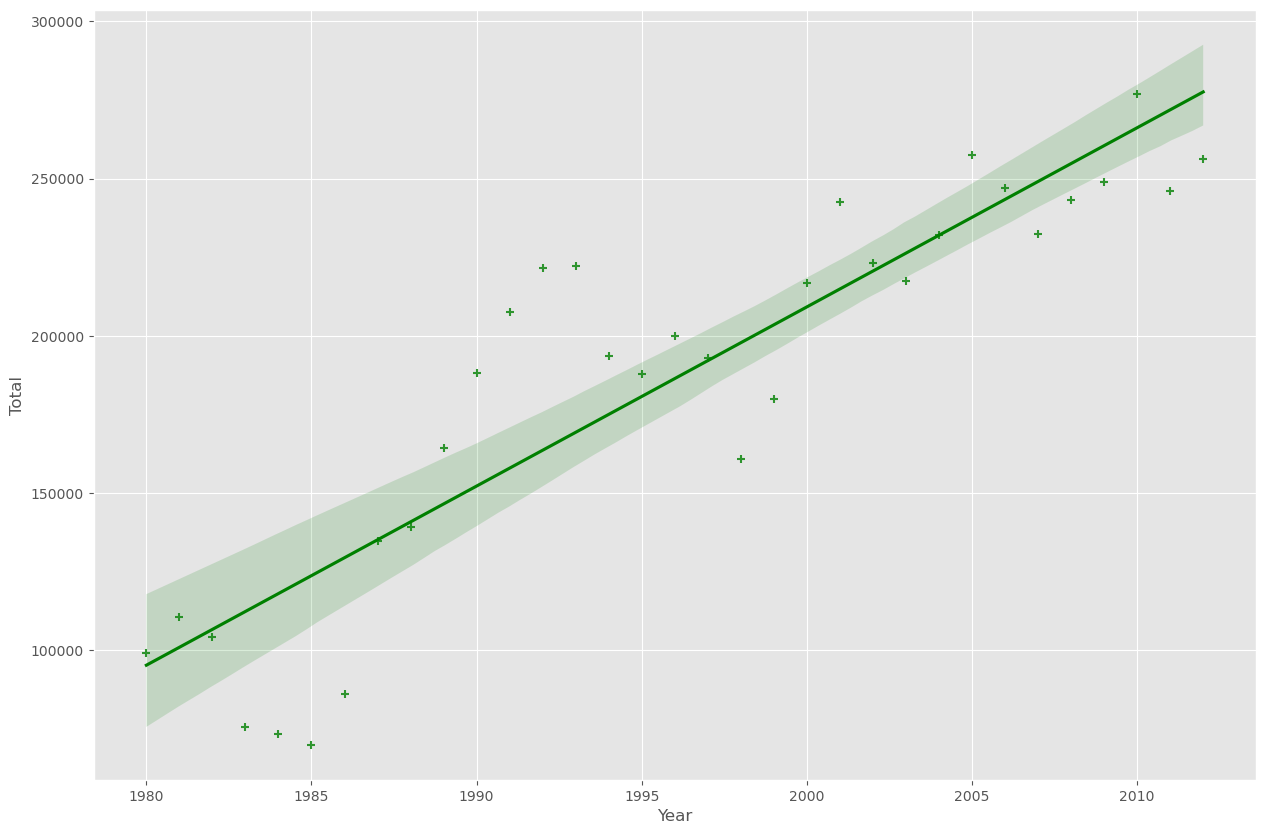

In [112]:
plt.figure(figsize=(15, 10))

sns.regplot(x='Year', y='Total', data=df_tot, color='green', marker='+')
plt.show()

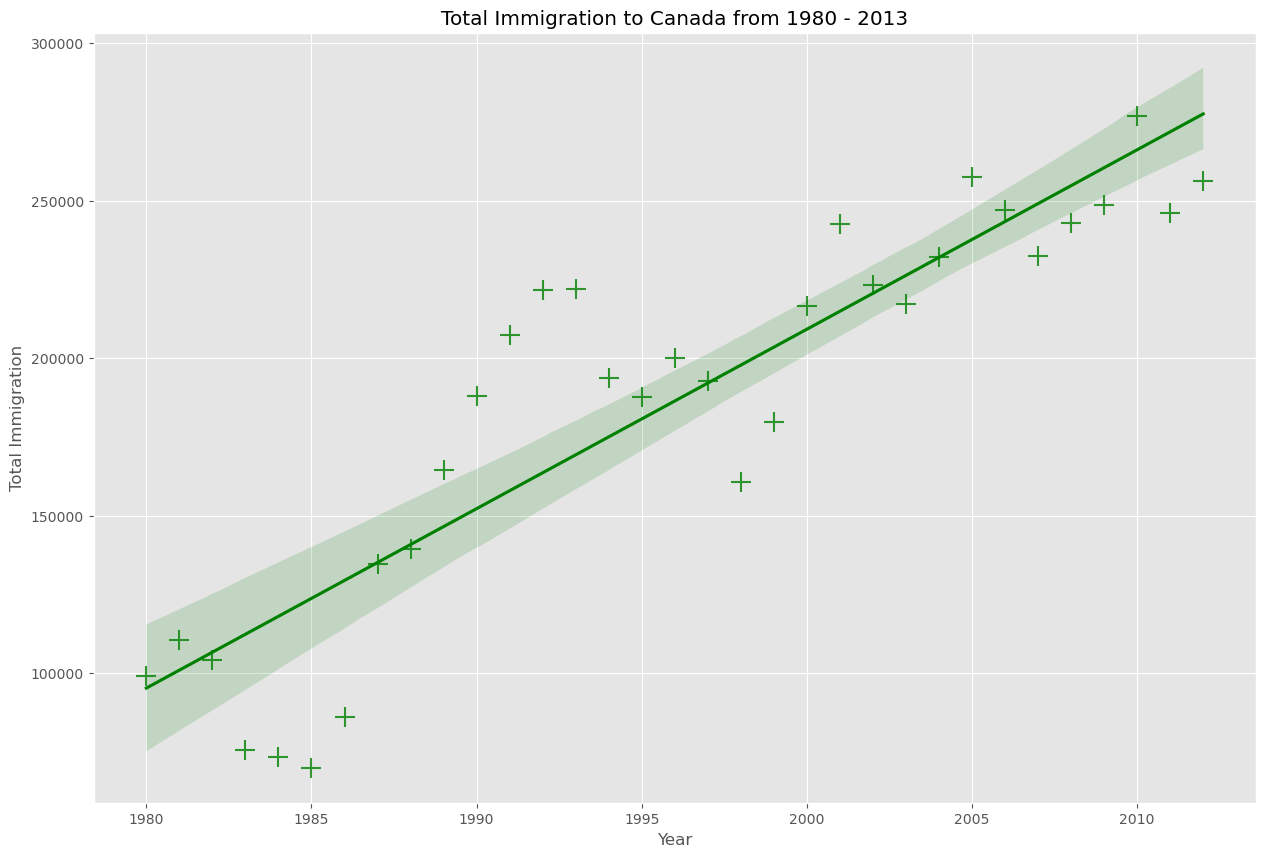

In [113]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Year', y='Total', data=df_tot,
                 color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

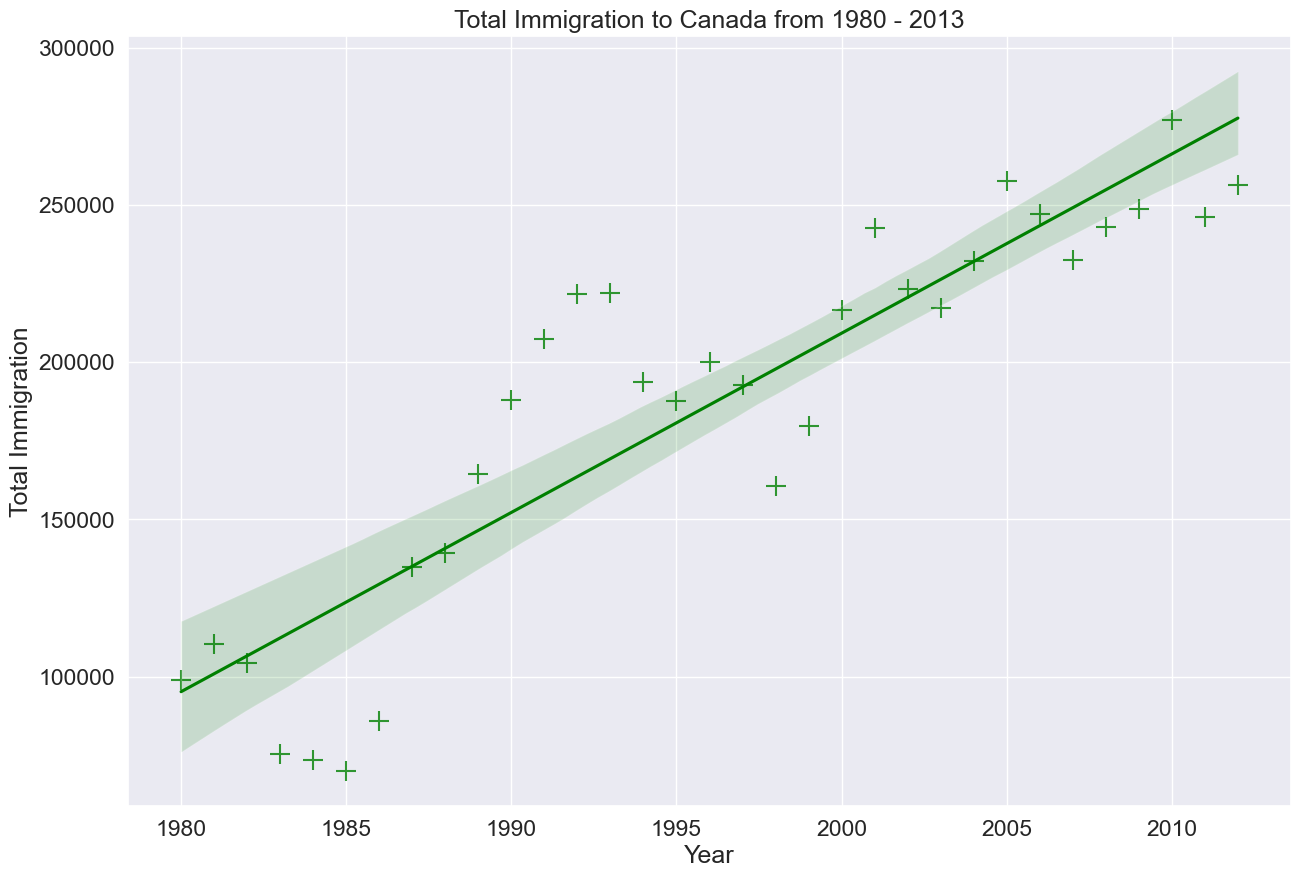

In [114]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Year', y='Total', data=df_tot,
                 color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

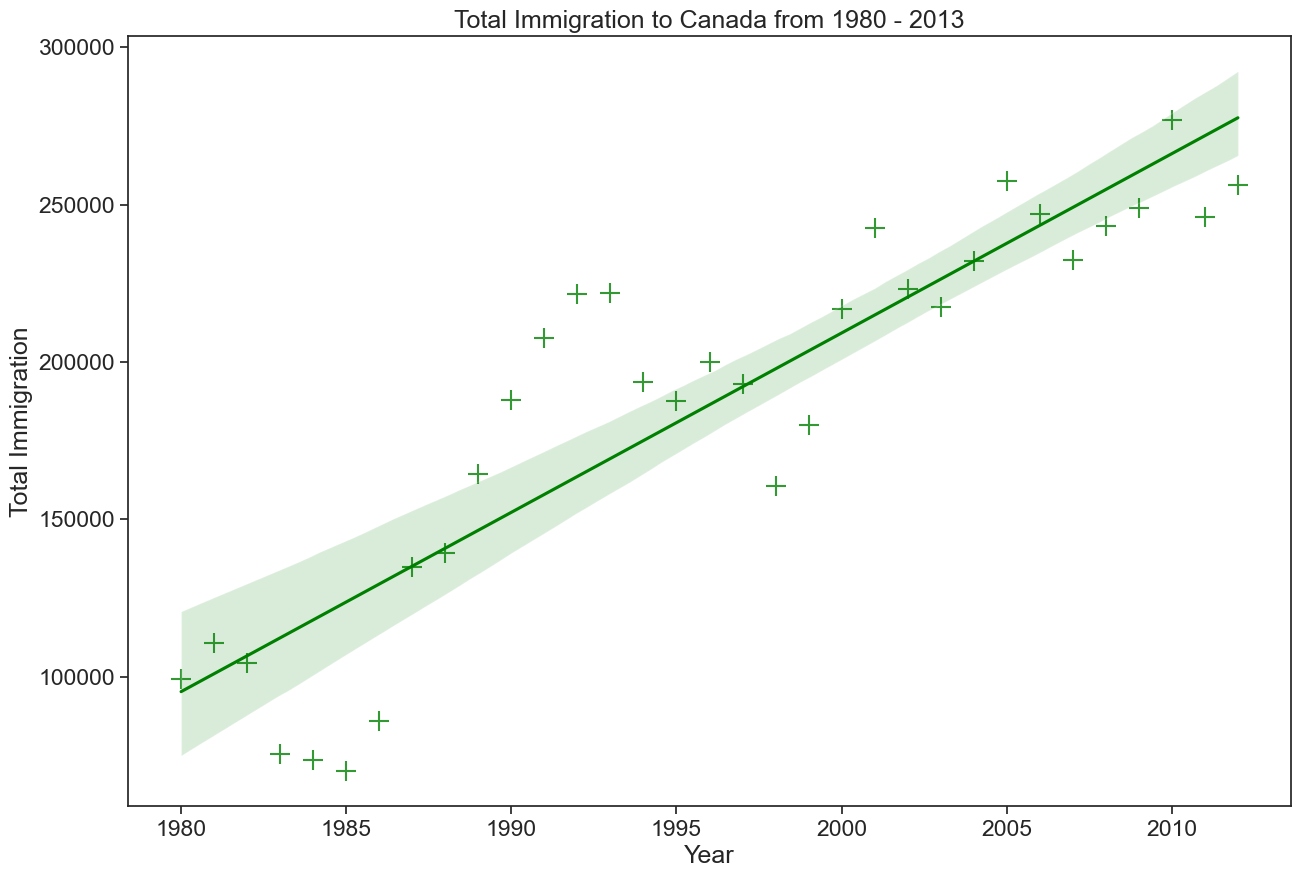

In [119]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='Year', y='Total', data=df_tot,
                 color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

<Figure size 1500x1000 with 0 Axes>

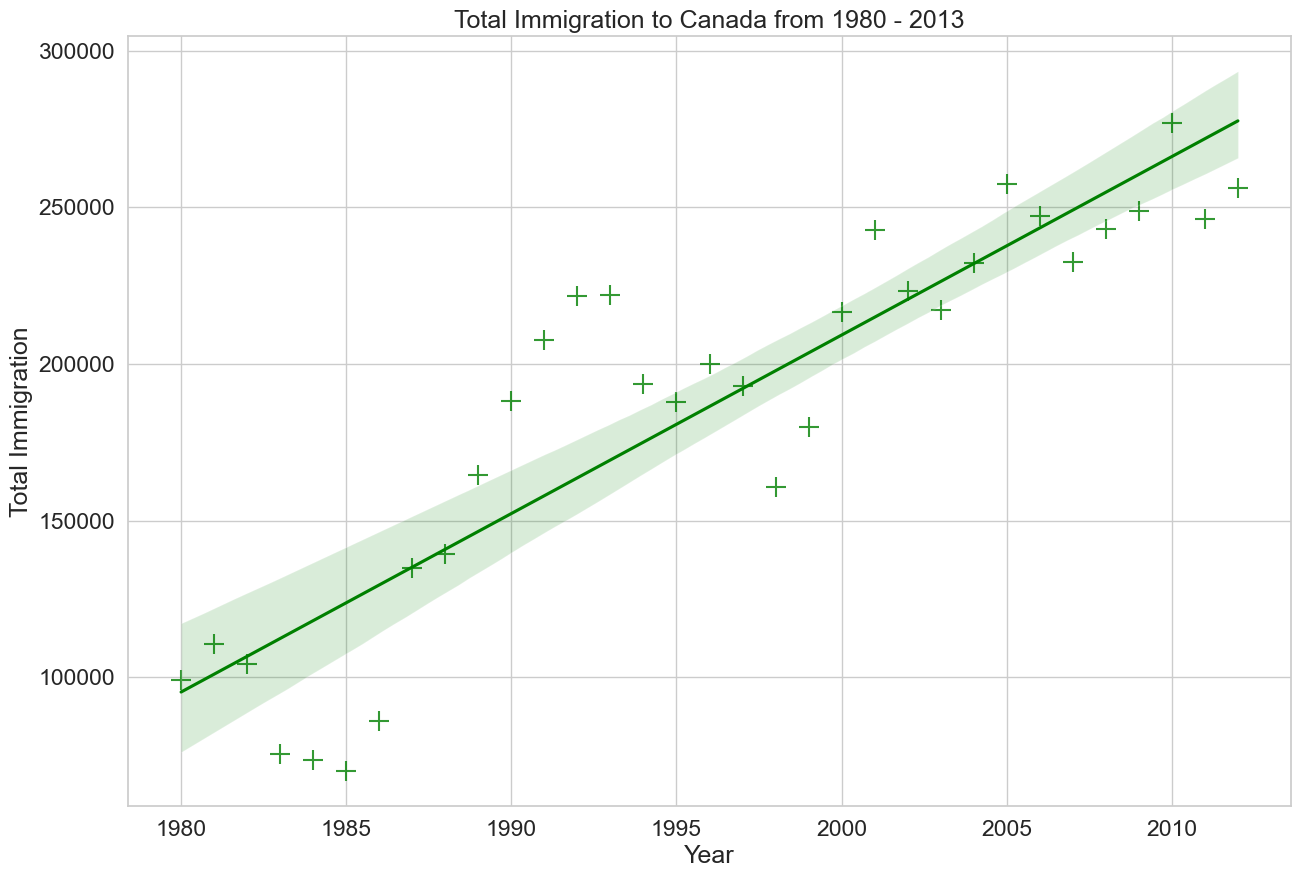

In [121]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Year', y='Total', data=df_tot,
                 color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

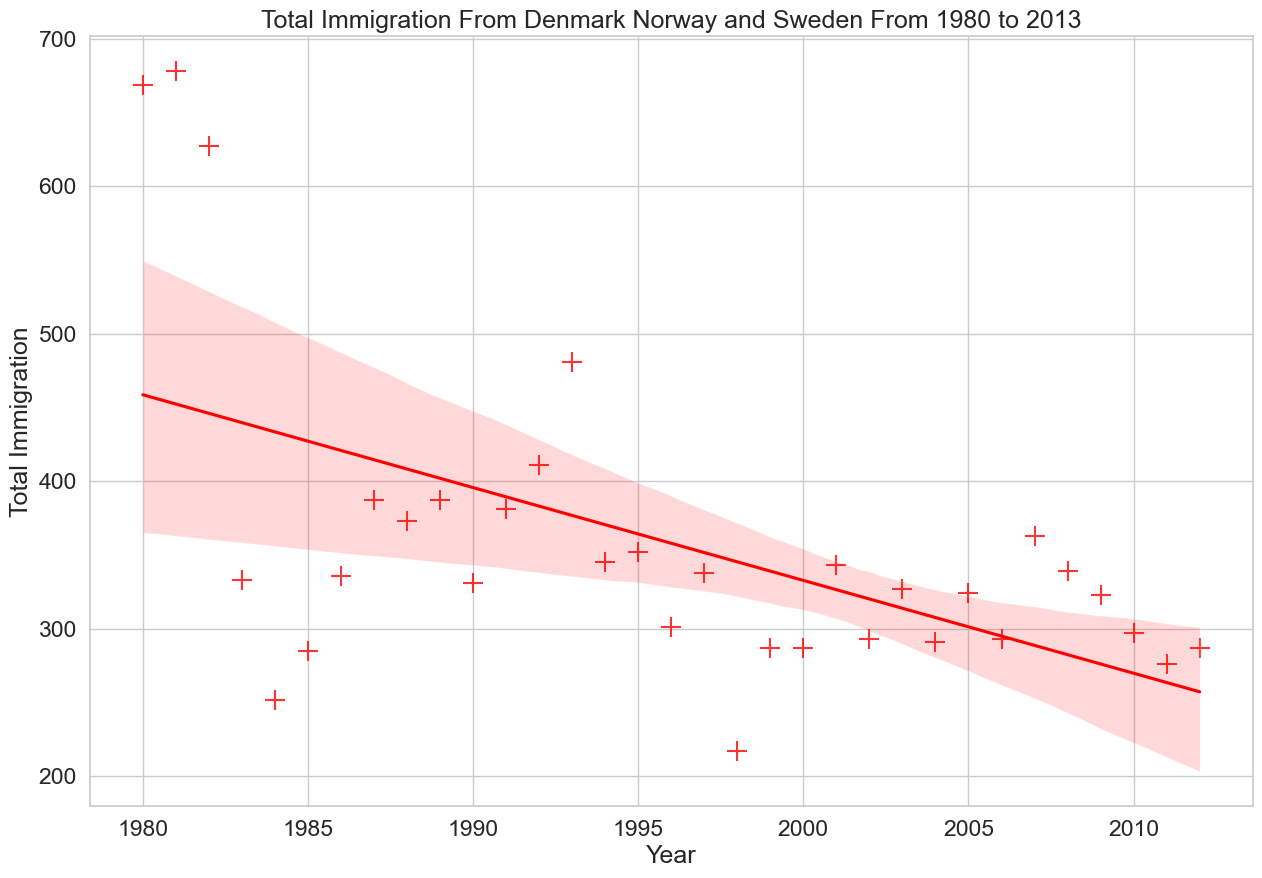

In [154]:
df_dns2 = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()

df_total = pd.DataFrame(df_dns2.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ["year", "total"]

df_total["year"] = df_total["year"].astype(int)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ax = sns.regplot(x="year", y="total", data=df_total, color="red", marker="+",
                 scatter_kws={'s': 200})

ax.set(xlabel="Year", ylabel="Total Immigration")
ax.set_title(
    "Total Immigration From Denmark Norway and Sweden From 1980 to 2013")
plt.show()